# MNIST Classification - Layerwise Output Analysis
---

## Description
In this project, I analyze the discriminating ability of each hidden layer of a feed-forward network in MNIST classification task. The network has 5 hidden layers each of 1024 units. It can be observed that after training the network, each subsequent hidden layer shows better ability to discriminate the input. This is evident from the quality of t-SNE clusters formed by the outputs of each hidden layer.

## Implementation

### 1. Import Required Libraries

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 2. Download MNIST Data

In [2]:
# Read MNIST data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### 3. Define Network Inputs

In [3]:
# Create placeholders

input_dim = mnist.train.images.shape[1]
output_dim = mnist.train.labels.shape[1]
    
x = tf.placeholder(tf.float32, shape = (None, input_dim))
y = tf.placeholder(tf.float32, shape = (None, output_dim))
    
train_mode = tf.placeholder(tf.bool, shape = ())

### 4. Specify Activations

In [4]:
# Define activations

hidden_layer_activation = tf.nn.relu
last_layer_activation = tf.nn.relu


### 5. Define Layers

#### Layer-1

In [5]:
# Layer-1
l1 = tf.layers.dense(inputs=x,
                    units=1024,
                    activation=hidden_layer_activation)

In [6]:
# Batch normalization
b1 = tf.layers.batch_normalization(l1)

#### Layer-2

In [7]:
# Layer-2
l2 = tf.layers.dense(inputs=b1,
                    units=1024,
                    activation=hidden_layer_activation)

In [8]:
# Batch normalization
b2 = tf.layers.batch_normalization(l2)

#### Layer-3

In [9]:
# Layer-3
l3 = tf.layers.dense(inputs=b2,
                    units=1024,
                    activation=hidden_layer_activation)

In [10]:
# Batch normalization
b3 = tf.layers.batch_normalization(l3)

#### Layer-4

In [11]:
# Layer-4
l4 = tf.layers.dense(inputs=b3,
                    units=1024,
                    activation=hidden_layer_activation)

In [12]:
# Batch notmalization
b4 = tf.layers.batch_normalization(l4)

#### Layer-5

In [13]:
# Layer-5
l5 = tf.layers.dense(inputs=b4,
                    units=1024,
                    activation=hidden_layer_activation)

In [14]:
# batch normalization
b5 = tf.layers.batch_normalization(l5)

#### Final Dense Layer (10 Classes)

In [15]:
# Last layer
y_hat = tf.layers.dense(inputs=b5,
                    units=10,
                    activation=last_layer_activation)

#### Softmax (10 Classes)

In [16]:
# Softmax
y_soft = tf.nn.softmax(y_hat)

### 6. Define Loss Function (Cross-Entropy Loss)

In [17]:
loss_function = tf.losses.softmax_cross_entropy(y, y_soft)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### 7. Training Operation: Adam Optimizer

In [18]:
train_op = tf.train.AdamOptimizer(learning_rate=0.00005, beta1=0.999, beta2=0.9999).minimize(loss_function)

### 8. Define Metric

In [19]:
correct_pred = tf.equal(tf.argmax(y_soft, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Training

In [20]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.33

In [21]:
epochs = 300
steps = 500
batch_size = 110
disp_steps = 100
val_acc = 0

In [22]:
with tf.Session(config=config) as sess:
    
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    for epoch in range(epochs):
        
            
        print("Epoch-", str(epoch+1))
            
        for step in range(1, steps + 1):
            train_x, train_y = mnist.train.next_batch(batch_size)
            sess.run(train_op, 
                     feed_dict={x: train_x,
                                y: train_y})
    
            if step % disp_steps == 0 or step == 1:
                loss, acc = sess.run([loss_function, accuracy],
                                     feed_dict={x: train_x,
                                                y: train_y})
                
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))
                
        val_loss, val_acc = sess.run([loss_function, accuracy],
                                       feed_dict={x: mnist.test.images[0:10000],
                                                  y: mnist.test.labels[0:10000]})
        print("Validation Loss= " + \
              "{:.4f}".format(val_loss) + ", Validation Accuracy= " + \
              "{:.3f}".format(val_acc))
    
    print("Optimization over!")
    
    o1, o2, o3, o4, o5, test_acc = sess.run([l1, l2, l3, l4, l5, accuracy], 
                                feed_dict={x: mnist.test.images[0:1000],
                                           y: mnist.test.labels[0:1000]})

print("Accuracy: ", test_acc)


Epoch- 1
Step 1, Minibatch Loss= 2.3004, Training Accuracy= 0.227
Step 100, Minibatch Loss= 1.8306, Training Accuracy= 0.645
Step 200, Minibatch Loss= 1.7192, Training Accuracy= 0.745
Step 300, Minibatch Loss= 1.7677, Training Accuracy= 0.700
Step 400, Minibatch Loss= 1.7343, Training Accuracy= 0.718
Step 500, Minibatch Loss= 1.7248, Training Accuracy= 0.736
Validation Loss= 1.7346, Validation Accuracy= 0.726
Epoch- 2
Step 1, Minibatch Loss= 1.6612, Training Accuracy= 0.791
Step 100, Minibatch Loss= 1.7584, Training Accuracy= 0.700
Step 200, Minibatch Loss= 1.7871, Training Accuracy= 0.673
Step 300, Minibatch Loss= 1.7122, Training Accuracy= 0.755
Step 400, Minibatch Loss= 1.6949, Training Accuracy= 0.755
Step 500, Minibatch Loss= 1.6513, Training Accuracy= 0.809
Validation Loss= 1.7193, Validation Accuracy= 0.740
Epoch- 3
Step 1, Minibatch Loss= 1.7258, Training Accuracy= 0.736
Step 100, Minibatch Loss= 1.7066, Training Accuracy= 0.755
Step 200, Minibatch Loss= 1.7845, Training Accura

Step 100, Minibatch Loss= 1.4710, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4870, Training Accuracy= 0.973
Step 300, Minibatch Loss= 1.4848, Training Accuracy= 0.982
Step 400, Minibatch Loss= 1.4980, Training Accuracy= 0.964
Step 500, Minibatch Loss= 1.4988, Training Accuracy= 0.955
Validation Loss= 1.4898, Validation Accuracy= 0.971
Epoch- 22
Step 1, Minibatch Loss= 1.4924, Training Accuracy= 0.964
Step 100, Minibatch Loss= 1.5071, Training Accuracy= 0.955
Step 200, Minibatch Loss= 1.4789, Training Accuracy= 0.982
Step 300, Minibatch Loss= 1.4710, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4890, Training Accuracy= 0.973
Step 500, Minibatch Loss= 1.4756, Training Accuracy= 0.982
Validation Loss= 1.4912, Validation Accuracy= 0.970
Epoch- 23
Step 1, Minibatch Loss= 1.4719, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4709, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4614, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4915, Training Accuracy= 0

Step 100, Minibatch Loss= 1.4795, Training Accuracy= 0.982
Step 200, Minibatch Loss= 1.4884, Training Accuracy= 0.973
Step 300, Minibatch Loss= 1.4807, Training Accuracy= 0.982
Step 400, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4820, Validation Accuracy= 0.980
Epoch- 42
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4701, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4819, Validation Accuracy= 0.979
Epoch- 43
Step 1, Minibatch Loss= 1.4709, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4794, Training Accuracy= 0.982
Step 200, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1

Step 100, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4707, Training Accuracy= 0.991
Validation Loss= 1.4820, Validation Accuracy= 0.979
Epoch- 62
Step 1, Minibatch Loss= 1.4707, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4815, Validation Accuracy= 0.980
Epoch- 63
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1

Step 100, Minibatch Loss= 1.4700, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4701, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Validation Loss= 1.4832, Validation Accuracy= 0.978
Epoch- 82
Step 1, Minibatch Loss= 1.4885, Training Accuracy= 0.973
Step 100, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 200, Minibatch Loss= 1.4799, Training Accuracy= 0.982
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Validation Loss= 1.4837, Validation Accuracy= 0.978
Epoch- 83
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4714, Training Accuracy= 0

Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 300, Minibatch Loss= 1.4638, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Validation Loss= 1.4817, Validation Accuracy= 0.979
Epoch- 102
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4699, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Validation Loss= 1.4793, Validation Accuracy= 0.982
Epoch- 103
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4702, Training Accuracy=

Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4805, Validation Accuracy= 0.980
Epoch- 122
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4689, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Validation Loss= 1.4819, Validation Accuracy= 0.979
Epoch- 123
Step 1, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4959, Training Accuracy= 0.964
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4882, Training Accuracy= 0.973
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4803, Validation Accuracy= 0.981
Epoch- 142
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4803, Validation Accuracy= 0.981
Epoch- 143
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Validation Loss= 1.4805, Validation Accuracy= 0.981
Epoch- 162
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4703, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Validation Loss= 1.4811, Validation Accuracy= 0.980
Epoch- 163
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4652, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Validation Loss= 1.4807, Validation Accuracy= 0.980
Epoch- 182
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4615, Training Accuracy= 1.000
Validation Loss= 1.4818, Validation Accuracy= 0.979
Epoch- 183
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4816, Validation Accuracy= 0.979
Epoch- 202
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 300, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Validation Loss= 1.4801, Validation Accuracy= 0.981
Epoch- 203
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

Step 100, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4793, Validation Accuracy= 0.982
Epoch- 222
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4613, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4884, Training Accuracy= 0.973
Step 500, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Validation Loss= 1.4814, Validation Accuracy= 0.980
Epoch- 223
Step 1, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 100, Minibatch Loss= 1.4734, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4814, Validation Accuracy= 0.980
Epoch- 242
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Validation Loss= 1.4802, Validation Accuracy= 0.981
Epoch- 243
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 500, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Validation Loss= 1.4798, Validation Accuracy= 0.982
Epoch- 262
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Validation Loss= 1.4809, Validation Accuracy= 0.980
Epoch- 263
Step 1, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4702, Training Accuracy=

Step 100, Minibatch Loss= 1.4695, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4826, Validation Accuracy= 0.979
Epoch- 282
Step 1, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 100, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 200, Minibatch Loss= 1.4702, Training Accuracy= 0.991
Step 300, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 400, Minibatch Loss= 1.4793, Training Accuracy= 0.982
Step 500, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Validation Loss= 1.4818, Validation Accuracy= 0.979
Epoch- 283
Step 1, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 100, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 200, Minibatch Loss= 1.4612, Training Accuracy= 1.000
Step 300, Minibatch Loss= 1.4612, Training Accuracy=

## T-SNE Clustering

In [23]:
from sklearn.manifold import TSNE

### Layer-1 Output

In [24]:
# Analyze output of layer-1
embed_o1 = TSNE(n_components=2).fit_transform(o1)
print(embed_o1.shape)

(1000, 2)


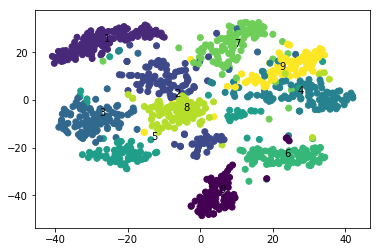

In [25]:
x_o1 = np.transpose(embed_o1)[0]
y_o1 = np.transpose(embed_o1)[1]

c_o1 = np.argmax(mnist.test.labels[0:1000], axis=1)

x_mean_o1 = np.zeros(10)
y_mean_o1 = np.zeros(10)

count_o1 = np.zeros(10)

for i in range(1000):
    x_mean_o1[c_o1[i]] += x_o1[i]
    y_mean_o1[c_o1[i]] += y_o1[i]
    count_o1[c_o1[i]] += 1

# Avoid divide-by-zero
for i in range(10):
    if count_o1[i] <= 0:
        x_mean_o1[i] = 0
        y_mean_o1[i] = 0
        count_o1[i] = 1

x_mean_o1 = np.divide(x_mean_o1, count_o1)
y_mean_o1 = np.divide(y_mean_o1, count_o1)

classes_o1 = np.arange(10)

fig, ax = plt.subplots()
ax.scatter(x_mean_o1, y_mean_o1, c=classes_o1)

for i, txt in enumerate(classes_o1):
    ax.annotate(txt, (x_mean_o1[i], y_mean_o1[i]))

plt.scatter(x_o1, y_o1, c=c_o1)

plt.show()

### Layer-2 Output

In [26]:
# Analyze output of layer-2
embed_o2 = TSNE(n_components=2).fit_transform(o2)
print(embed_o2.shape)

(1000, 2)


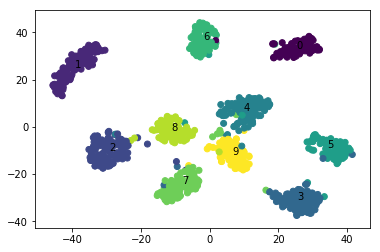

In [27]:
x_o2 = np.transpose(embed_o2)[0]
y_o2 = np.transpose(embed_o2)[1]

c_o2 = np.argmax(mnist.test.labels[0:1000], axis=1)

x_mean_o2 = np.zeros(10)
y_mean_o2 = np.zeros(10)

count_o2 = np.zeros(10)

for i in range(1000):
    x_mean_o2[c_o2[i]] += x_o2[i]
    y_mean_o2[c_o2[i]] += y_o2[i]
    count_o2[c_o2[i]] += 1

# Avoid divide-by-zero
for i in range(10):
    if count_o2[i] <= 0:
        x_mean_o2[i] = 0
        y_mean_o2[i] = 0
        count_o2[i] = 1

x_mean_o2 = np.divide(x_mean_o2, count_o2)
y_mean_o2 = np.divide(y_mean_o2, count_o2)

classes_o2 = np.arange(10)

fig, ax = plt.subplots()
ax.scatter(x_mean_o2, y_mean_o2, c=classes_o2)

for i, txt in enumerate(classes_o2):
    ax.annotate(txt, (x_mean_o2[i], y_mean_o2[i]))

plt.scatter(x_o2, y_o2, c=c_o2)

plt.show()

### Layer-3 Output

In [28]:
# Analyze output of layer-3
embed_o3 = TSNE(n_components=2).fit_transform(o3)
print(embed_o3.shape)

(1000, 2)


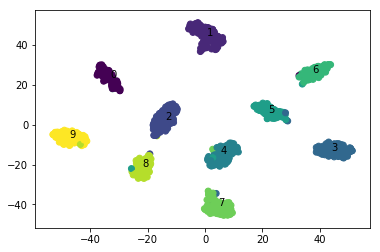

In [29]:
x_o3 = np.transpose(embed_o3)[0]
y_o3 = np.transpose(embed_o3)[1]

c_o3 = np.argmax(mnist.test.labels[0:1000], axis=1)

x_mean_o3 = np.zeros(10)
y_mean_o3 = np.zeros(10)

count_o3 = np.zeros(10)

for i in range(1000):
    x_mean_o3[c_o3[i]] += x_o3[i]
    y_mean_o3[c_o3[i]] += y_o3[i]
    count_o3[c_o3[i]] += 1

# Avoid divide-by-zero
for i in range(10):
    if count_o3[i] <= 0:
        x_mean_o3[i] = 0
        y_mean_o3[i] = 0
        count_o3[i] = 1

x_mean_o3 = np.divide(x_mean_o3, count_o3)
y_mean_o3 = np.divide(y_mean_o3, count_o3)

classes_o3 = np.arange(10)

fig, ax = plt.subplots()
ax.scatter(x_mean_o3, y_mean_o3, c=classes_o3)

for i, txt in enumerate(classes_o3):
    ax.annotate(txt, (x_mean_o3[i], y_mean_o3[i]))

plt.scatter(x_o3, y_o3, c=c_o3)

plt.show()

### Layer-4 Output

In [30]:
# Analyze output of layer-4
embed_o4 = TSNE(n_components=2).fit_transform(o4)
print(embed_o4.shape)

(1000, 2)


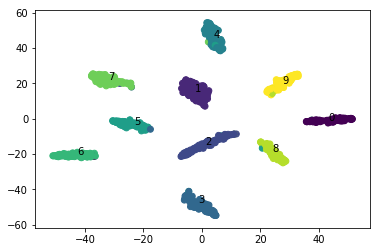

In [31]:
x_o4 = np.transpose(embed_o4)[0]
y_o4 = np.transpose(embed_o4)[1]

c_o4 = np.argmax(mnist.test.labels[0:1000], axis=1)

x_mean_o4 = np.zeros(10)
y_mean_o4 = np.zeros(10)

count_o4 = np.zeros(10)

for i in range(1000):
    x_mean_o4[c_o4[i]] += x_o4[i]
    y_mean_o4[c_o4[i]] += y_o4[i]
    count_o4[c_o4[i]] += 1

# Avoid divide-by-zero
for i in range(10):
    if count_o4[i] <= 0:
        x_mean_o4[i] = 0
        y_mean_o4[i] = 0
        count_o4[i] = 1

x_mean_o4 = np.divide(x_mean_o4, count_o4)
y_mean_o4 = np.divide(y_mean_o4, count_o4)

classes_o4 = np.arange(10)

fig, ax = plt.subplots()
ax.scatter(x_mean_o4, y_mean_o4, c=classes_o4)

for i, txt in enumerate(classes_o4):
    ax.annotate(txt, (x_mean_o4[i], y_mean_o4[i]))

plt.scatter(x_o4, y_o4, c=c_o4)

plt.show()

### Layer-5 Output

In [32]:
# Analyze output of layer-5
embed_o5 = TSNE(n_components=2).fit_transform(o5)
print(embed_o5.shape)

(1000, 2)


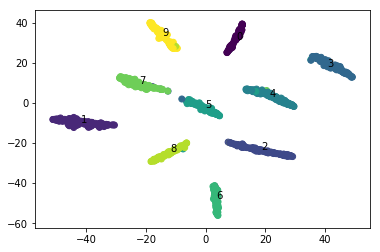

In [33]:
x_o5 = np.transpose(embed_o5)[0]
y_o5 = np.transpose(embed_o5)[1]

c_o5 = np.argmax(mnist.test.labels[0:1000], axis=1)

x_mean_o5 = np.zeros(10)
y_mean_o5 = np.zeros(10)

count_o5 = np.zeros(10)

for i in range(1000):
    x_mean_o5[c_o5[i]] += x_o5[i]
    y_mean_o5[c_o5[i]] += y_o5[i]
    count_o5[c_o5[i]] += 1

# Avoid divide-by-zero
for i in range(10):
    if count_o5[i] <= 0:
        x_mean_o5[i] = 0
        y_mean_o5[i] = 0
        count_o5[i] = 1

x_mean_o5 = np.divide(x_mean_o5, count_o5)
y_mean_o5 = np.divide(y_mean_o5, count_o5)

classes_o5 = np.arange(10)

fig, ax = plt.subplots()
ax.scatter(x_mean_o5, y_mean_o5, c=classes_o5)

for i, txt in enumerate(classes_o5):
    ax.annotate(txt, (x_mean_o5[i], y_mean_o5[i]))

plt.scatter(x_o5, y_o5, c=c_o5)

plt.show()

## Conclusion
We see that the outputs of each subsequent hidden layer forms better clusters. Thus, the layer nearer to the network-output has better discriminative ability than the layer farther from the network-output.